# 연구 목적

피험자 50명의 7개 eeg 채널(FP1, FP2, F3, Fz, F4, O1, O2)과 2개의 eog채널 (vertical, horizontal) 데이터를 수집을 했다. 각 피험자가 3가지 영상(유튜브동영상, 2가지의 광고)을 시청하는 동안의 뇌파를 측정했다. 

모든 피험자가 같은 유튜브동영상 1개와 광고 2개(전기차 광고, 유니세프 광고)를 시청한다. 유튜브동영상의 길이는 약 6분정도이고 전기차 광고와 유니세프 광고는 각각 30초 가량이다. 
모든 피험자가 검은 화면 7초, 전기차광고 30초, 유튜브동영상 순서로 시청하는데, 50명 중 절반은 유니세프 광고를 유튜브동영상의 약 1분 30초 지점에서 유니세프 광고를 시청하고 나머지 절반은 유튜브동영상의 약 4분 30초 지점에서 유니세프 광고를 시청했다. 

즉, 피험자들을 두 그룹으로 나누어 중간광고 삽입 위치를 다르게 하였다. 그룹 A는 유튜브동영상의 전반부(1분 30초지점)에서 중간광고를 시청하고, 그룹 B는 유튜브동영상의 후반부(4분 30초지점)에서 중간광고를 시청했다. 

이 실험의 목적은 중간광고의 위치에 따라서 광고효과가 어떻게 변하는지 알고자 하는 것이다. 
광고효과를 피험자가 광고에 얼마나 집중하는지(집중도)와 광고에 얼마나 긍정적으로 반응했는지(동기)로 정의하고, EEG alpha파를 이용해 집중도와 동기를 측정하고자 한다. 



# 측정방법

Morgan Cerf와 Manuel Garcia-Garcia(2017)가 Consumer NeuroScience에서 제시한 방법을 따라서 집중도(Attention Index)와 동기(Approach/Withdrawal Index)를 측정했다. 

Attention Index(AI)는 한 피험자의 left frontal alpha값을 제곱한 값을 평균낸 값에 -1을 곱해서 사용한다. 

#### AI = -{(FP1 alpha)^2 + (F3 alpha)^2}/2로 정의했다. 이 AI값이 클수록 집중도가 높은 것이다.  
이 Attention Index는 사람이 무언가에 집중할때 left frontal alpha 값이 감소한다는 Klimesch(1999)와 Petersen과 Posner(2012)의 연구를 바탕으로 Morgan Cerf와 Manuel Garcia-Garcia가 제시한 측정방법이다. 

Approach/Withdrawal Index(AW)는 마찬가지로 Morgan Cerf와 Manuel Garcia-Garcia가 제시한 방법으로 좌뇌가 긍정적인 감정을 처리하고 우뇌가 부정적인 감정을 처리한다는 Coan과 Allen(2003) 그리고 Davison(2004)의 EEG frontal asymmetry theory에 기반한다. 
우뇌의 알파파 활성이 우세한 경우 Approach, 좌뇌 알파파 활성이 우세한 경우 Withdrawal로 보았다. 

#### AW = {(FP2 alhpa)^2+(F4 alpha)^2}/2 - {(FP1 alpha)^2 + (F3 alpha)^2}/2 이다. AW값이 클수록 우뇌 알파파 활성이 우세하기 때문에 Approach, AW값이 작을수록 Withdrawal 동기를 가졌다고 할 수 있다. 



이 분석에서는 각 피험자의 뇌파데이터에서 AI와 AW값을 계산하고 표준화한 뒤에 A그룹끼리, B그룹끼리 평균낸 값을 A그룹의 AI, AW, B그룹의 AI, BW로 한다. 이 분석에 사용된 데이터는 미리 linefrequncy(60Hz)와 EOG artifact를 제거하고 alpha band만 추출한 데이터이다. 



# 데이터 설명

각 피험자의 원본 뇌파데이터에서 linefrequncy(60Hz)와 EOG artifact를 제거, alpha band를 추출하고, 영상을 시청한 부분의 뇌파만 잘라낸 데이터를 사용한다.

# 분석절차

이 분석에서는 50명 각 피험자의 뇌파데이터에서 AI와 AW값을 계산하고 표준화한 뒤에 A그룹끼리, B그룹끼리 평균낸 값을 A그룹의 AI, AW, B그룹의 AI, BW로 한다.
1. 50명 각 피험자의 AI, AW계산 후, 50명을 A그룹, B그룹으로 나누어 각 그룹의 AI, AW의 평균값 계산
3. 시계열 시각화
 



# 분석

## 1. 각 피험자의 AI, AW계산

In [22]:
import pandas as pd 
import numpy as np 
from scipy import stats
import glob

In [27]:
#처리할 파일 목록
als = sorted(glob.glob("*A.xlsx")) #그룹 A: 중간광고 삽입위치가 영상의 전반부인 그룹의 피험자리스트
bls =sorted(glob.glob("*B.xlsx")) #그룹 B: 중간광고 삽입위치가 영상의 후반부인 그룹의 피험자리스트 
print(als, bls)
print(len(als),len(bls))

['101A.xlsx', '103A.xlsx', '105A.xlsx', '107A.xlsx', '109A.xlsx', '111A.xlsx', '113A.xlsx', '115A.xlsx', '117A.xlsx', '119A.xlsx', '121A.xlsx', '123A.xlsx', '125A.xlsx', '127A.xlsx', '129A.xlsx', '131A.xlsx', '133A.xlsx', '135A.xlsx', '137A.xlsx', '139A.xlsx', '141A.xlsx', '143A.xlsx', '145A.xlsx', '147A.xlsx', '149A.xlsx'] ['102B.xlsx', '104B.xlsx', '106B.xlsx', '108B.xlsx', '110B.xlsx', '112B.xlsx', '114B.xlsx', '116B.xlsx', '118B.xlsx', '120B.xlsx', '122B.xlsx', '124B.xlsx', '126B.xlsx', '128B.xlsx', '130B.xlsx', '132B.xlsx', '134B.xlsx', '136B.xlsx', '138B.xlsx', '140B.xlsx', '142B.xlsx', '144B.xlsx', '146B.xlsx', '148B.xlsx', '150B.xlsx']
25 25


In [30]:
pd.read_excel(als[0]).head() #피험자 번호 101A의 뇌파데이터 확인

,fp1_alpha,fp2_alpha,f3_alpha,fz_alpha,f4_alpha,o1_alpha,o2_alpha,fp1_alpha_zscore,fp2_alpha_zscore,o1_alpha_zscore,o2_alpha_zscore,AttentionIndex,AWIndex,index,f3_alpha_zscore,fz_alpha_zscore,f4_alpha_zscore
0,0.005854,-0.000661,0.004380,0.002075,-0.002879,-0.003361,-0.004695,4.537927,-1.019698,-2.025072,-3.367858,-8.951061,-8.372378,0,4.482361,2.470089,-2.979048
1,0.005891,-0.000664,0.004322,0.002041,-0.002909,-0.003245,-0.004684,4.566658,-1.024628,-1.955129,-3.359802,-8.967878,-8.483124,1,4.422921,2.429718,-3.010387
2,0.005905,-0.000676,0.004229,0.001992,-0.002919,-0.003127,-0.004656,4.577620,-1.042487,-1.883938,-3.340376,-8.883286,-8.521991,2,4.328061,2.371943,-3.021088
3,0.005898,-0.000693,0.004105,0.001932,-0.002908,-0.003008,-0.004609,4.572705,-1.068252,-1.812120,-3.306652,-8.706450,-8.496888,3,4.201270,2.299643,-3.009497
4,0.005872,-0.000712,0.003953,0.001860,-0.002875,-0.002889,-0.004540,4.552106,-1.098468,-1.740845,-3.256679,-8.444545,-8.409456,4,4.045199,2.214224,-2.975705


In [31]:
pd.read_excel(bls[0]).head() #피험자 번호 102B의 뇌파데이터 확인

,fp1_alpha,fp2_alpha,f3_alpha,fz_alpha,f4_alpha,o1_alpha,o2_alpha,fp1_alpha_zscore,fp2_alpha_zscore,o1_alpha_zscore,o2_alpha_zscore,AttentionIndex,AWIndex,index,f3_alpha_zscore,fz_alpha_zscore,f4_alpha_zscore
0,-0.003611,-0.001882,-0.001583,-0.000884,0.000237,0.003570,0.004014,-2.390299,-1.203740,1.957080,2.231422,-0.460901,-1.056703,0,-1.715499,-1.049624,0.236933
1,-0.003439,-0.001783,-0.001558,-0.000867,0.000170,0.003554,0.003998,-2.276609,-1.140341,1.948047,2.222323,-0.399266,-0.963963,1,-1.688470,-1.029503,0.169521
2,-0.003270,-0.001689,-0.001535,-0.000852,0.000098,0.003523,0.003964,-2.164699,-1.080268,1.931351,2.203890,-0.342348,-0.875534,2,-1.663326,-1.011669,0.097716
3,-0.003100,-0.001596,-0.001509,-0.000835,0.000026,0.003482,0.003919,-2.052220,-1.020803,1.908506,2.178465,-0.288203,-0.790514,3,-1.635159,-0.991052,0.026532
4,-0.002928,-0.001500,-0.001476,-0.000811,-0.000040,0.003431,0.003864,-1.937762,-0.959803,1.880734,2.147893,-0.235574,-0.708793,4,-1.599654,-0.963541,-0.039252


In [57]:
#그룹 A 각 피험자의 AI와 AW계산 (비교를 위해 다른 인덱스도 함께 계산)
AI = pd.DataFrame()
AW = pd.DataFrame()


for data in als: 
    
    df=pd.read_excel(data)
    
    #각 피험자의 인덱스들 계산 
    df['AI']=-(df.fp1_alpha**2+df.f3_alpha**2)/2
    df['AW']=(df.fp2_alpha**2+df.f4_alpha**2)/2-(df.fp1_alpha**2+df.f3_alpha**2)/2

                           
    #그룹 A 25명의 각각의 인덱스들을 표준화하여 하나의 변수에 저장함                    
    AI = pd.concat([AI, pd.DataFrame(stats.zscore(df['AI']))], axis =1, ignore_index=True)
    AW = pd.concat([AW, pd.DataFrame(stats.zscore(df['AW']))], axis =1, ignore_index=True)
            
    



In [59]:
AI.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-9.609840,0.031212,-4.878892,0.382385,0.233767,0.132473,0.093371,-0.012943,-0.353900,0.231363,...,0.167561,0.346835,0.207575,0.212578,0.425133,0.208903,0.182827,0.405019,0.235505,0.363115
1,-9.596578,0.035303,-4.833896,0.385021,0.224891,0.136574,0.104696,-0.040665,-0.391599,0.244847,...,0.173903,0.344960,0.221639,0.207013,0.386993,0.210116,0.298614,0.402085,0.260716,0.357004
2,-9.478264,0.038484,-4.772277,0.383315,0.221012,0.138961,0.116128,-0.066613,-0.404878,0.279736,...,0.176806,0.344598,0.237239,0.202089,0.330610,0.212065,0.366730,0.399493,0.282330,0.350022
3,-9.268902,0.040671,-4.694851,0.380069,0.223560,0.139244,0.126663,-0.088941,-0.405603,0.319593,...,0.176878,0.344007,0.254858,0.197957,0.266729,0.214628,0.384951,0.397250,0.299972,0.342339
4,-8.977449,0.041843,-4.601783,0.377134,0.230882,0.137447,0.135874,-0.105623,-0.396351,0.359977,...,0.176232,0.342648,0.274241,0.194746,0.206306,0.217742,0.357288,0.395232,0.313423,0.334217


In [60]:
Ares=pd.DataFrame()

Ares['AI']=AI.mean(axis=1)
Ares['AW']=AW.mean(axis=1)


Ares.to_excel('Group A 인덱스.xlsx')


In [63]:
Ares.head()

,AI,AW
0,-0.396279,-0.526412
1,-0.390465,-0.514844
2,-0.381795,-0.501314
3,-0.371358,-0.487887
4,-0.358849,-0.474059


In [61]:
#그룹 B 각피험자의 AI와 AW계산 (비교를 위해 다른 인덱스도 함께 계산)

B_AI = pd.DataFrame()
B_AW = pd.DataFrame()


for data in bls: 
    
    df=pd.read_excel(data)
    
    #각 피험자의 인덱스들 계산
    df['AI']=-(df.fp1_alpha**2+df.f3_alpha**2)/2
    df['AW']=(df.fp2_alpha**2+df.f4_alpha**2)/2-(df.fp1_alpha**2+df.f3_alpha**2)/2
    
    #그룹 B 25명의 각각의 인덱스들을 표준화하여 하나의 변수에 저장함                    
    B_AI = pd.concat([B_AI, pd.DataFrame(stats.zscore(df['AI']))], axis =1, ignore_index=True)
    B_AW = pd.concat([B_AW, pd.DataFrame(stats.zscore(df['AW']))], axis =1, ignore_index=True)

                      



In [62]:
Bres=pd.DataFrame()

Bres['AI']=B_AI.mean(axis=1)
Bres['AW']=B_AW.mean(axis=1)

Bres.to_excel('Group B 인덱스.xlsx')



In [64]:
Bres.head()

,AI,AW
0,-0.081617,-0.084125
1,-0.083184,-0.084155
2,-0.087361,-0.084536
3,-0.093719,-0.085576
4,-0.101525,-0.087926


In [146]:
df=pd.concat([Ares,Bres])
df.to_excel('Group AB index.xlsx')

## 1. Attention index

Morgan Cerf와 Manuel Garcia-Garcia(2017)가 Consumer NeuroScience에서 제시한 방법을 따라서 집중도(Attention Index)와 동기(Approach/Withdrawal Index)를 측정했다. 

Attention Index(AI)는 한 피험자의 left frontal alpha값을 제곱한 값을 평균낸 값에 -1을 곱해서 사용한다. 

#### AI = -{(FP1 alpha)^2 + (F3 alpha)^2}/2로 정의했다. 이 AI값이 클수록 집중도가 높은 것이다.  
이 Attention Index는 사람이 무언가에 집중할때 left frontal alpha 값이 감소한다는 Klimesch(1999)와 Petersen과 Posner(2012)의 연구를 바탕으로 Morgan Cerf와 Manuel Garcia-Garcia가 제시한 측정방법이다. 

In [147]:
df=pd.read_excel('Group AB index.xlsx')

In [149]:
df['group']=np.where(df.index<len(Ares),'A','B');df.head()

,Unnamed: 0,AI,AW,group
0,0,-0.396279,-0.526412,A
1,1,-0.390465,-0.514844,A
2,2,-0.381795,-0.501314,A
3,3,-0.371358,-0.487887,A
4,4,-0.358849,-0.474059,A


In [153]:
df['time']=df.iloc[:,0:1]
idx=df.pivot(index='time', columns='group', values='AI')

In [155]:
idx.head()

group,A,B
time,,
0,-0.396279,-0.081617
1,-0.390465,-0.083184
2,-0.381795,-0.087361
3,-0.371358,-0.093719
4,-0.358849,-0.101525


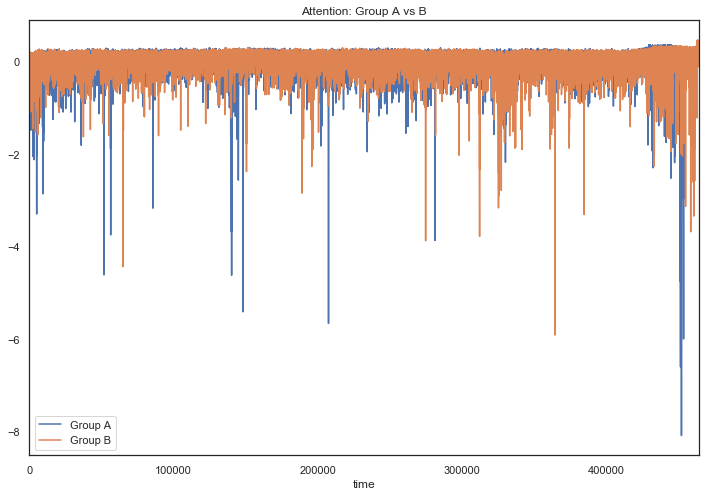

In [160]:
import matplotlib.pyplot as plt
result = pd.DataFrame({
                      'Group A': idx.A,
                       'Group B':idx.B})
sns.set_style("white")
result.plot(title="Attention: Group A vs B")
plt.gcf().set_size_inches(12,8)

#### 그룹 A, B간의 Attention Index 차이를 비교하기 위해서 단순이동평균을 적용한 결과이다. 1만개 데이터 (10초)로 이동평균 구했다
그 결과 중간광고가 삽입된 시점에서 Attention이 크게 낮아진 것을 확인할 수 있다. 

그래프에서 회색으로 표시된 부분은 A그룹이 중간광고를 시청하는 시간이고, 빨간색으로 표시된 부분은 B그룹이 중간광고를 시청하는 부분이다.

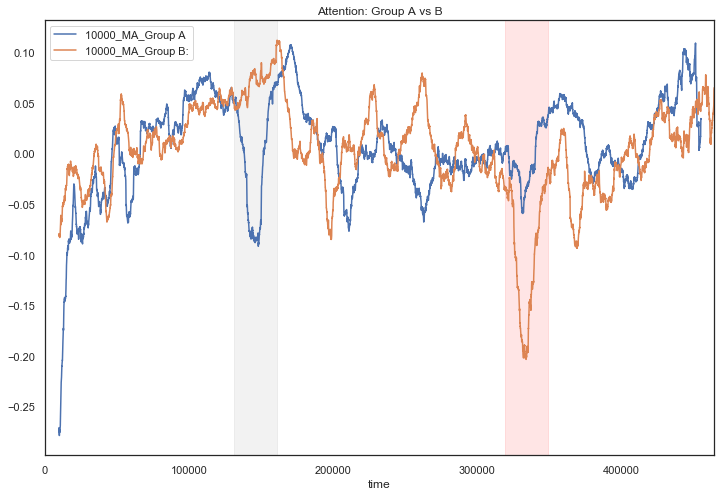

In [162]:
ra = idx.A.rolling(10000).mean()
rb = idx.B.rolling(10000).mean()

result = pd.DataFrame({
                      '10000_MA_Group A': ra,
                       '10000_MA_Group B:':rb})



result.plot(title="Attention: Group A vs B")

plt.gcf().set_size_inches(12,8)
plt.axvspan(131000, 161000, color='gray', alpha=0.1)
plt.axvspan(319000, 349000, color='red', alpha=0.1)
plt.show()

두 그룹의 중간광고 부분만 비교하면 다음과 같다

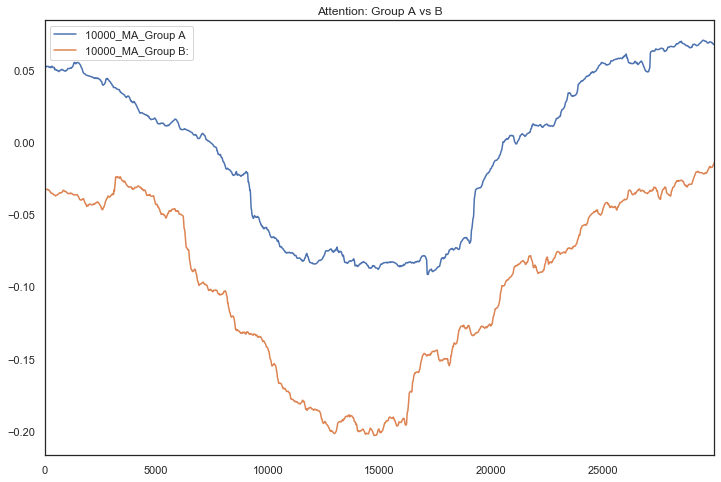

In [165]:
ra = idx.A.rolling(10000).mean()
rb = idx.B.rolling(10000).mean()

result = pd.DataFrame({
                      '10000_MA_Group A': ra[131000:161000].reset_index(drop=True),
                       '10000_MA_Group B:':rb[319000:349000].reset_index(drop=True)})


sns.set_style("white")
plt.show()
result.plot(title="Attention: Group A vs B")

plt.gcf().set_size_inches(12,8)
plt.show()

### 중간광고 앞에 본 영상이 중간광고를 시청하는데 영향을 주지 않고 중간광고 시작 이후에는  Attention level이 중간광고에 의해서만 변한다고 가정하면, 두 그래프를 시작점을 같게 평행이동한 후 비교할 수 있다.

## 두 그래프의 시작점을 같게하고 비교한 결과 0초에서 6초 사이(빨간색으로 표시된 부분)의 A,B그룹간의 Attention의 차이가 있는 것으로 보인다.

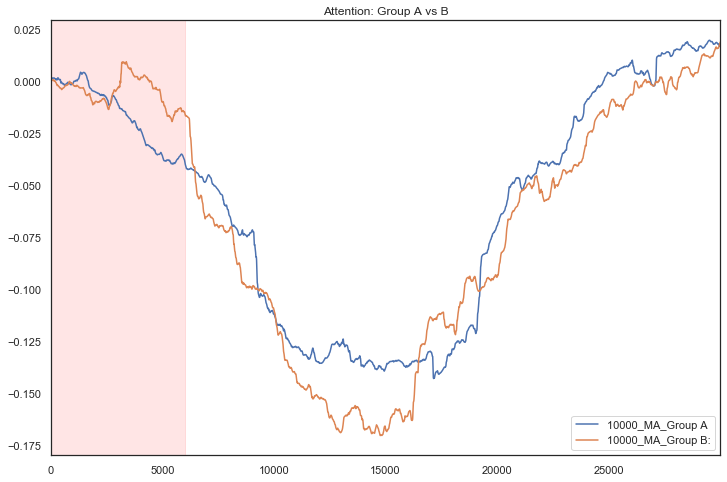

In [310]:
result = pd.DataFrame({
                      '10000_MA_Group A': ra[131000:161000].reset_index(drop=True)-ra[131000:131001].values,
                       '10000_MA_Group B:':rb[319000:349000].reset_index(drop=True)-rb[319000:319001].values})


result.plot(title="Attention: Group A vs B")

plt.gcf().set_size_inches(12,8)
plt.axvspan(0, 6000, color='red', alpha=0.1)
plt.show()

## 0초에서 6초 사이에서 그룹 B의 평균 attention level이 그룹 A보다 높을 것이다는 가설검정을 한다.

In [311]:
x=pd.DataFrame()
x['A']=(ra[131000:137000].reset_index(drop=True)-ra[131000:131001].values)
x['B']=(rb[319000:325000].reset_index(drop=True)-rb[319000:319001].values)

In [312]:
x.describe()

,A,B
count,6000.000000,6000.000000
mean,-0.015680,-0.004577
std,0.014893,0.006663
min,-0.039825,-0.019392
25%,-0.031870,-0.009816
50%,-0.011396,-0.003365
75%,-0.001353,0.000058
max,0.004335,0.009420


In [313]:
#정규성과 등분산 가정 t-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(x.A, x.B)
print ('t-stats = ',stat)
print('p-value =  ',p)

t-stats =  -52.71555210606807
p-value =   0.0


### 정규성과 등분산성을 가정했을때 t-test 결과 t=-52.7, p<.000으로 두 그룹간의 차이는 통계적으로 유의하다

In [316]:
#정규성 검정 Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(x.A)
print ('stat:   ',stat)
print('p-value:',p)

stat:    0.884483814239502
p-value: 0.0


In [317]:
#정규성 검정 Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(x.B)
print ('stat:   ',stat)
print('p-value:',p)

stat:    0.9784667491912842
p-value: 3.342883248088766e-29


### 정규성 검정 결과 p<0.000으로 두 표본이 모두 정규성을 만족하지 않으므로 Wilcoxon Sign-Ranked test를 진행한다

In [318]:
x['difference'] = x['B'] - x['A']
x['difference'][x['difference']==0]

0    0.0
Name: difference, dtype: float64

In [319]:
stats.wilcoxon(x['difference'])

WilcoxonResult(statistic=4003826.0, pvalue=2.014799647594513e-303)

### Wilcoxon Sign-Ranked Test 결과 t=4003826.0, p<0.000으로 B그룹의 median이 A그룹의 median보다 높은 것으로 나타났다.

##  Attention index 분석결과 요약
Wilcoxon Sign-Ranked Test 결과 t=4003826.0, p<0.000으로 B그룹의 median이 A그룹의 median보다 높은 것으로 나타났다. 따라서 3초에서 6초 사이에서 그룹 B의 attention level이 그룹 A보다 높다.

### 즉, 중간광고 삽입위치가 전반부일때 보다 후반부일때 0초부터 6초사이의 attention이 더 높았다

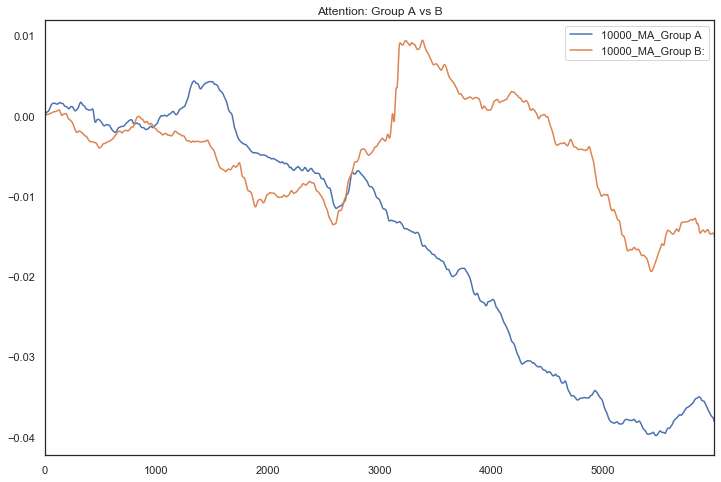

In [322]:
result = pd.DataFrame({
                      '10000_MA_Group A': ra[131000:137000].reset_index(drop=True)-ra[131000:131001].values,
                       '10000_MA_Group B:':rb[319000:325000].reset_index(drop=True)-rb[319000:319001].values})


result.plot(title="Attention: Group A vs B")

plt.gcf().set_size_inches(12,8)
#plt.axvspan(0, 6000, color='red', alpha=0.1)
plt.show()

## 2. Approach index